### Importar librerias necesarias

## EJERCICIO MÓDULO 3:

Uso de Pandas y Seaborn + algún gráfico de Plotly.

* Agrupaciones con groupby y visualizarla
        * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

* PARTE 3: 20 % distribuciones: 

* Outliers: Visualización Q1 y Q3 y calcular límites tukey y filtrar. Sobre la columna precio.

* asimetría, curtosis y transformar datos con logaritmo o raíz cuadrada

* Discretizar la columna precio por barato, medio, caro usando la función pd.cut


* PARTE 4: 30 % visualizaciones:

* Seaborn EDAS:
    * univariantes:
        * histogramas y curvas de densidad
        * boxplot
        * countplot
    * bivariantes y multivariantes
        * scatterplot con hue, con size, con style
        * Calcular correlación con Pandas y mostrarla con seaborn
        * Hacer la correlación en un gráfico de barras para la columna 'price'
        * Crear una pivot table usando como index y columns algunas variables categóricas y como values usar el price y visualizarla con heatmap de seaborn
    * Combinarlas con:
        * hue, style, size, row, col usando un relplot
        * filtro

Domingo 19/01 23:59 fecha entrega.

* m3_nombre_apellido.ipynb

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## PARTE 1

### Carga del CSV con Pandas

In [2]:
df_diamonds = pd.read_csv('../Data/diamonds.csv')
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53939 non-null  float64
 1   cut      53937 non-null  object 
 2   color    53938 non-null  object 
 3   clarity  53938 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53938 non-null  float64
 6   price    53938 non-null  object 
 7   x        53938 non-null  object 
 8   y        53939 non-null  float64
 9   z        53939 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


#### Informacón sobre el CSV

In [3]:
df_diamonds.describe()

,carat,depth,table,y,z
count,53939.000000,53940.000000,53938.000000,53939.000000,53939.000000
mean,0.797946,61.749405,57.457145,5.734479,3.538722
std,0.474013,1.432621,2.234521,1.142092,0.705700
min,0.200000,43.000000,43.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,6.540000,4.040000
max,5.010000,79.000000,95.000000,58.900000,31.800000


In [4]:
df_diamonds.isna().sum()

carat      1
cut        3
color      2
clarity    2
depth      0
table      2
price      2
x          2
y          1
z          1
dtype: int64

#### Limpieza de nulos (limpiar valores NaN):
- Nulos en columnas continuas: mediana, media

In [5]:
# Columna Carat
media_carat = round(df_diamonds['carat'].mean(), 2)
print(f" La media de quilates es: {media_carat}")

 La media de quilates es: 0.8


In [6]:
df_diamonds['carat'] = df_diamonds['carat'].fillna(media_carat)
df_diamonds['carat'].isna().sum()

np.int64(0)

In [7]:
# Columna Cut
moda_cut = df_diamonds['cut'].mode()[0]
print(f" La moda de corte es: {moda_cut}")

 La moda de corte es: Ideal


In [8]:
df_diamonds['cut'] = df_diamonds['cut'].fillna(moda_cut)
df_diamonds['cut'].isna().sum()

np.int64(0)

In [9]:
# Columna Color
mediana_color = df_diamonds['color'].mode()[0]
print(f" La mediana de color es: {mediana_color}")

 La mediana de color es: G


In [10]:
df_diamonds['color'] = df_diamonds['color'].fillna(mediana_color)
df_diamonds['color'].isna().sum()

np.int64(0)

In [11]:
# Columna Clarrity
mode_clarity = df_diamonds['clarity'].mode()[0]
print(f" La mediana de claridad es: {mode_clarity}")

 La mediana de claridad es: SI1


In [12]:
# Rrelleno con un valor fijo tambien como pedia el enunciado
df_diamonds['clarity'] = df_diamonds['clarity'].fillna("Relleno")
df_diamonds['clarity'].isna().sum()

np.int64(0)

In [13]:
# Columna Table
mediana_table = round(df_diamonds['table'].mean(), 2)
print(f" La mediana del plano superior es: {mediana_table}")

 La mediana del plano superior es: 57.46


In [14]:
df_diamonds['table'] = df_diamonds['table'].fillna(mediana_table)
df_diamonds['table'].isna().sum()

np.int64(0)

In [15]:
# Columna Price
mode_price = df_diamonds['price'].mode()[0]
print(f" La moda del plano superior es: {mode_price}")

 La moda del plano superior es: 605


In [16]:
df_diamonds['price'] = df_diamonds['price'].fillna(mode_price)
df_diamonds['price'].isna().sum()

np.int64(0)

In [17]:
# Columna X
mode_x_column = df_diamonds['x'].mode()[0]
print(f" La moda de la columna X es: {mode_x_column}")

 La moda de la columna X es: 4.37


In [18]:
df_diamonds['x'] = df_diamonds['x'].fillna(mode_x_column)
df_diamonds['x'].isna().sum()

np.int64(0)

In [19]:
# Columna Y
mode_y_column = round(df_diamonds['y'].mean(), 2)
print(f" La media de la columna Y es: {mode_y_column}")

 La media de la columna Y es: 5.73


In [20]:
df_diamonds['y'] = df_diamonds['y'].fillna(mode_y_column)
df_diamonds['y'].isna().sum()

np.int64(0)

In [21]:
# Columna Z
mode_z_column = round(df_diamonds['z'].mean(), 2)
print(f" La media de la columna Y es: {mode_z_column}")

 La media de la columna Y es: 3.54


In [22]:
df_diamonds['z'] = df_diamonds['z'].fillna(mode_z_column)
df_diamonds['z'].isna().sum()

np.int64(0)

In [23]:
# Comprobamos que ya no hay nulos
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Limpieza de valores error: 
* hay columnas que tienen un valor '?', por tanto se deben reemplazar por un valor nan.

In [24]:
# Buscamos los valores erroneos y los pasamos a nulos para despues limpiarlos
df_diamonds[df_diamonds.isin(["?"]).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
49222,0.56,Ideal,?,VVS2,61.6,56.0,2081,?,5.29,3.27
49227,0.50,?,E,VVS2,61.7,61.0,2083,5.09,5.12,3.15
49229,0.70,Good,H,VS2,63.8,60.0,?,5.59,5.51,3.54


In [25]:
# Comprobamos que hemos eliminado los valores "?"
df_diamonds = df_diamonds.replace("?", pd.NA)
df_diamonds[df_diamonds.isin(["?"]).any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [26]:
# Comprobamos que despues del paso anterior tenemos 3 valores NaN en las columnas correspondientes
df_diamonds.isna().sum()

carat      0
cut        1
color      1
clarity    0
depth      0
table      0
price      1
x          1
y          0
z          0
dtype: int64

In [27]:
# Procedemos a eliminar esos nulos con los valores calculados anteriormente
df_diamonds['cut'] = df_diamonds['cut'].fillna(moda_cut)
df_diamonds['cut'].isna().sum()

np.int64(0)

In [28]:
df_diamonds['color'] = df_diamonds['color'].fillna(mediana_color)
df_diamonds['color'].isna().sum()

np.int64(0)

In [29]:
df_diamonds['price'] = df_diamonds['price'].fillna(mode_price)
df_diamonds['price'].isna().sum()

np.int64(0)

In [30]:
df_diamonds['x'] = df_diamonds['x'].fillna(mode_x_column)
df_diamonds['x'].isna().sum()

np.int64(0)

In [31]:
# Comprobamos que ya no hay nulos
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

#### Cambio de tipo de dato: .astype()
- Columna "carat" a tipo "float16"
- Columna "cut" a tipo "categorical"


In [32]:
# Comprobamos los tipo de datos actuales
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  object 
 7   x        53940 non-null  object 
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(5), object(5)
memory usage: 4.1+ MB


In [33]:
df_diamonds["carat"] = df_diamonds["carat"].astype("float16")
print(df_diamonds["carat"].dtypes)

float16


In [34]:
df_diamonds["cut"] = df_diamonds["cut"].astype("category")
print(df_diamonds["cut"].dtypes)

category


#### Encoding: texto a numérico
- Uso de la función get_dummies() para encoding one_hot

In [35]:
df_diamonds_encoding = pd.read_csv('../Data/diamonds.csv')

In [36]:
df_diamonds_encoding.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [37]:
pd.get_dummies(df_diamonds_encoding)

,carat,depth,table,y,z,cut_?,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,x_9.42,x_9.44,x_9.49,x_9.51,x_9.53,x_9.54,x_9.65,x_9.66,x_9.86,x_?
0,0.23,61.5,55.0,3.98,2.43,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.21,59.8,61.0,3.84,2.31,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,0.23,56.9,65.0,4.07,2.31,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0.29,62.4,58.0,4.23,2.63,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0.31,63.3,58.0,4.35,2.75,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,5.76,3.50,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
53936,0.72,63.1,55.0,5.75,3.61,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
53937,0.70,62.8,60.0,5.68,3.56,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53938,0.86,61.0,58.0,6.12,3.74,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


* Uso de map para encoding ordinal para la columna cut como una nueva columna cut_int: 1, 2, 3, 4

In [38]:
# Buscamos los tipos de corte que hay
tipos_corte =  df_diamonds['cut'].unique()
tipos_corte

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']

In [39]:
# Creamos un diccionario con los numeros ordinales 
num_ordinal = {categoria: i + 1 for i, categoria in enumerate(tipos_corte)}
num_ordinal

{'Ideal': 1, 'Premium': 2, 'Good': 3, 'Very Good': 4, 'Fair': 5}

In [40]:
# Creamos la columna con los numeros ordinales
df_diamonds_encoding['cut_int'] = df_diamonds_encoding['cut'].map(num_ordinal)
print(df_diamonds_encoding)

       carat        cut color clarity  depth  table price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0   326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0   326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0   327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0   334   4.2  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0   335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...   ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0  2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0  2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0  2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0  2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0  2757  5.83  5.87  3.64   

       cut_int  
0          1.0  
1          2.0  


## PARTE 2

#### Uso de función map o apply
 * crear una columna price_iva a partir de la columna price que muestre el precio + IVA (21%)

In [41]:
# Comprobamos de que tipo es la columna "Price"
print(df_diamonds["price"].dtypes)

object


In [55]:
# Cambiamos el tipo de la columna de "Object" a "Float16"
df_diamonds["price"] = df_diamonds["price"].astype("float16")
print(df_diamonds["price"].dtypes)

float16


In [59]:
df_diamonds['price_iva'] = df_diamonds['price'].apply(lambda x: round(x * 0.21, 2))
df_diamonds

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva
0,0.229980,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43,68.46
1,0.209961,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31,68.46
2,0.229980,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31,68.67
3,0.290039,Premium,I,VS2,62.4,58.0,334.0,4.2,4.23,2.63,70.14
4,0.310059,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75,70.35
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.720215,Ideal,D,SI1,60.8,57.0,2756.0,5.75,5.76,3.50,578.76
53936,0.720215,Good,D,SI1,63.1,55.0,2756.0,5.69,5.75,3.61,578.76
53937,0.700195,Very Good,D,SI1,62.8,60.0,2756.0,5.66,5.68,3.56,578.76
53938,0.859863,Premium,H,SI2,61.0,58.0,2756.0,6.15,6.12,3.74,578.76


* Crear una nueva columna volumen combinando: x * y * z

In [69]:
df_diamonds["x"] = df_diamonds["x"].astype("float16")
df_diamonds['volumen'] = (df_diamonds['x'] * df_diamonds['y'] * df_diamonds['z'])
df_diamonds

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volumen
0,0.229980,Ideal,E,SI2,61.5,55.0,326.0,3.949219,3.98,2.43,68.46,38.194474
1,0.209961,Premium,E,SI1,59.8,61.0,326.0,3.890625,3.84,2.31,68.46,34.511400
2,0.229980,Good,E,VS1,56.9,65.0,327.0,4.050781,4.07,2.31,68.67,38.084230
3,0.290039,Premium,I,VS2,62.4,58.0,334.0,4.199219,4.23,2.63,70.14,46.715889
4,0.310059,Good,J,SI2,63.3,58.0,335.0,4.339844,4.35,2.75,70.35,51.915381
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.720215,Ideal,D,SI1,60.8,57.0,2756.0,5.750000,5.76,3.50,578.76,115.920000
53936,0.720215,Good,D,SI1,63.1,55.0,2756.0,5.691406,5.75,3.61,578.76,118.139365
53937,0.700195,Very Good,D,SI1,62.8,60.0,2756.0,5.660156,5.68,3.56,578.76,114.452888
53938,0.859863,Premium,H,SI2,61.0,58.0,2756.0,6.148438,6.12,3.74,578.76,140.730356


#### Ordenar por dos columnas con sort_values():
* tipo de corte (cut) y precio (price)

In [70]:
df_diamonds['price'] = df_diamonds['price'].astype('float32')
df_diamonds.sort_values(['cut', 'price'])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,carat,cut,color,clarity,depth,table,price,x,y,z,price_iva,volumen
8,0.219971,Fair,E,VS2,65.1,61.0,337.0,3.869141,3.78,2.49,70.77,36.417125
28270,0.250000,Fair,E,VS1,55.2,64.0,361.0,4.210938,4.23,2.33,75.81,41.502579
31611,0.229980,Fair,G,VVS2,61.4,66.0,369.0,3.869141,3.91,2.39,77.49,36.156732
31615,0.270020,Fair,E,VS1,66.4,58.0,371.0,3.990234,4.02,2.66,77.91,42.668374
10030,0.300049,Fair,J,VS2,64.8,58.0,416.0,4.238281,4.16,2.72,87.36,47.957000
...,...,...,...,...,...,...,...,...,...,...,...,...
27729,2.000000,Very Good,F,SI1,57.9,60.0,18752.0,8.281250,8.34,4.81,3937.92,332.205656
27733,1.509766,Very Good,F,VVS1,62.6,59.0,18784.0,7.328125,7.24,4.56,3944.64,241.933650
27736,2.029297,Very Good,H,SI1,63.0,60.0,18784.0,8.000000,7.93,5.02,3944.64,318.468800
27745,2.000000,Very Good,H,SI1,62.8,57.0,18800.0,7.949219,8.00,5.01,3948.00,318.604688


* Agrupaciones con groupby y visualizarla
    * Agrupar por las 3 que hay de tipo categórico calculando la media, max, min por ejemplo de alguna de las numéricas: price, carat, depth

In [72]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   carat      53940 non-null  float16 
 1   cut        53940 non-null  category
 2   color      53940 non-null  object  
 3   clarity    53940 non-null  object  
 4   depth      53940 non-null  float64 
 5   table      53940 non-null  float64 
 6   price      53940 non-null  float32 
 7   x          53940 non-null  float16 
 8   y          53940 non-null  float64 
 9   z          53940 non-null  float64 
 10  price_iva  53940 non-null  float64 
 11  volumen    53940 non-null  float64 
dtypes: category(1), float16(2), float32(1), float64(6), object(2)
memory usage: 3.8+ MB


In [78]:
df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]})

/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_2818/19955734.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]})


price                      
                            min      max         mean
cut       color clarity                              
Fair      D     I1       2492.0  15968.0  7384.000000
                IF       1208.0   2212.0  1620.000000
                Relleno     NaN      NaN          NaN
                SI1       644.0  16384.0  4273.482910
                SI2       536.0  16088.0  4354.928711
...                         ...      ...          ...
Very Good J     SI2       430.0  17168.0  5993.179688
                VS1       394.0  17920.0  4339.558105
                VS2       357.0  18432.0  5325.592285
                VVS1      544.0  10808.0  3175.421143
                VVS2      336.0  16040.0  5960.034668

[315 rows x 3 columns]

In [80]:
df_diamonds_table = df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]}).reset_index()

/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_2818/798875415.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diamonds_table = df_diamonds.groupby(["cut", "color", "clarity"]).agg({"price":["min", "max", "mean"]}).reset_index()


In [85]:
# Ajustar nombres de columnas
df_diamonds_table.columns = ['cut', 'color', 'clarity', 'price_min', 'price_max', 'price_mean']

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#46327e'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#46327e'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#46327e'` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 


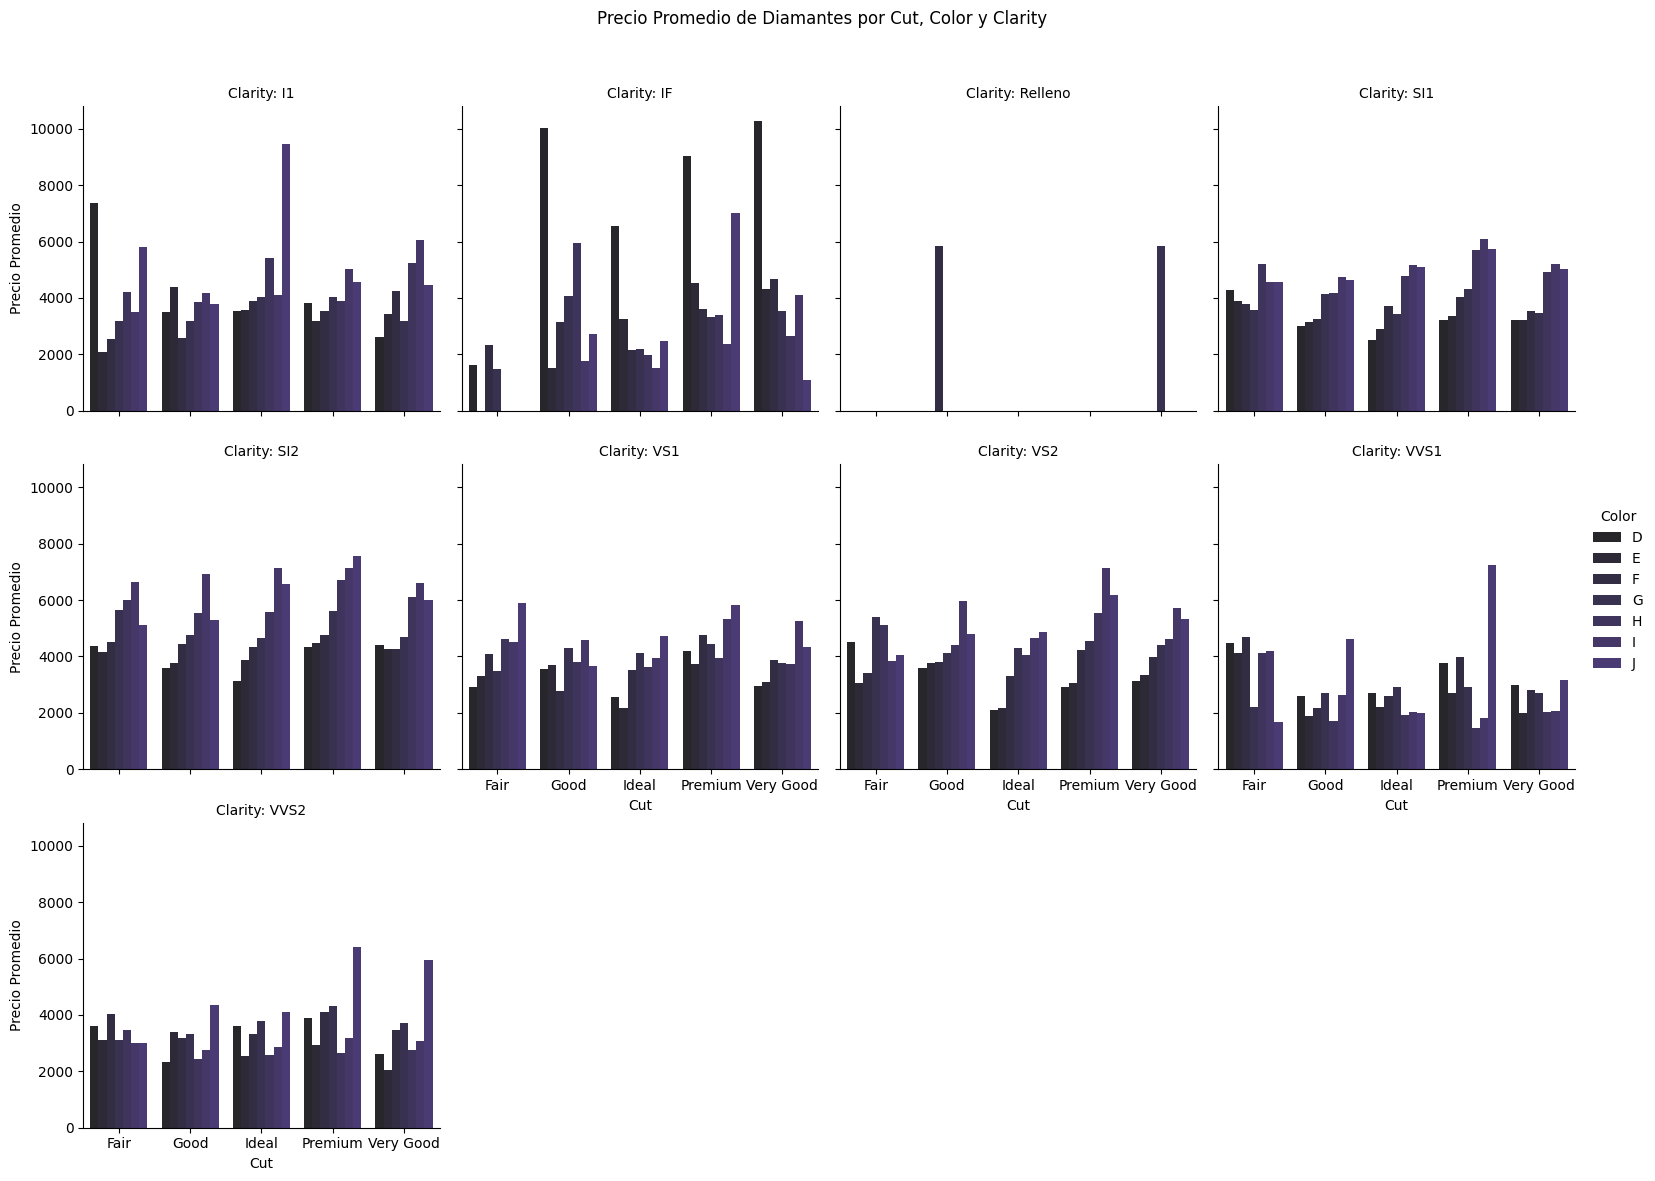

In [95]:
df_diamonds_long = df_diamonds_table.melt(
    id_vars=["cut", "color", "clarity"],
    value_vars=["price_mean"],
    var_name="statistic",
    value_name="price_value"
)

# Obtener los niveles únicos para las variables categóricas
cut_order = sorted(df_diamonds_table["cut"].unique())
color_order = sorted(df_diamonds_table["color"].unique())

# Crear un FacetGrid para visualizar el precio promedio por Cut, Color y Clarity
fg = sns.FacetGrid(
    df_diamonds_long,
    col="clarity",
    col_wrap=4,
    height=4,
    sharey=True
)
fg.map(
    sns.barplot,
    "cut", "price_value", "color",
    order=cut_order,  # Orden explícito para "cut"
    hue_order=color_order,  # Orden explícito para "color"
    errorbar=None
).add_legend(title="Color")


# Configurar títulos y etiquetas
fg.set_titles("Clarity: {col_name}")
fg.set_axis_labels("Cut", "Precio Promedio")
plt.subplots_adjust(top=0.9)
fg.fig.suptitle("Precio Promedio de Diamantes por Cut, Color y Clarity")
plt.show()

